# Import Necessary Packages

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
pd.options.mode.chained_assignment = None  # default='warn'

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import importlib

### Import NucML Utilities

In [3]:
import sys
# This allows us to import the nucml utilities
sys.path.append("..")

import nucml.exfor.data_utilities as exfor_utils
import nucml.exfor.plotting_utilities as exfor_plot
import nucml.endf.data_utilities as endf_utils
import nucml.plot.plotting_utilities as plot_utils
import nucml.datasets as nuc_data
importlib.reload(exfor_utils)
importlib.reload(exfor_plot)
importlib.reload(endf_utils)
importlib.reload(plot_utils)
importlib.reload(nuc_data)
print("Finish importing scripts.")

Finish importing scripts.


# Importing EXFOR and ENDF Data

### Loading EXFOR Data

In [29]:
df = nuc_data.load_exfor()

/Users/pedrovicentevaldez/Desktop/ML_Nuclear_Data/ML_Data/EXFOR_neutrons/EXFOR_neutrons_MF3_AME_no_NaNRaw.csv
Reading data into dataframe...
Data read into dataframe with shape:  (4240711, 66)
Finished. Resulting dataset has shape  (4240711, 66)


In [37]:
# df["Energy"] = df["Energy"] / 1E6
# df["Data"] = df["Data"] / 1E6

In [38]:
uranium_233 = exfor_utils.load_exfor_samples(df, 92, 233, "1", one_hot=False)
chlorine_35 = exfor_utils.load_exfor_samples(df, 17, 35, "103", one_hot=False)

Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (33385, 66)
Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (215, 66)


In [14]:
uranium = exfor_utils.load_exfor_element(df, 92, one_hot=False)

Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (469549, 66)


### Load U-233(n,f)X XS ENDF Data

In [39]:
# Loading U233 fission data
endf_u = nuc_data.load_endf("U233", "MT018")

/Users/pedrovicentevaldez/Desktop/ML_Nuclear_Data/ML_Data/ENDF_neutrons/U233/endfb8.0/tables/xs/n-U233-MT018.endfb8.0
Convering MeV to eV...
Convering mb to b...
Finish reading ENDF data with shape:  (15345, 2)


### Loading Cl35(n,p)S-35 ENDF XS Data and New Measurments

In [40]:
# load_endf() extracts ENDF data from ML_Data directory
endf_cl = nuc_data.load_endf("Cl035", "MT103", mev_to_ev=False, mb_to_b=False)

/Users/pedrovicentevaldez/Desktop/ML_Nuclear_Data/ML_Data/ENDF_neutrons/Cl035/endfb8.0/tables/xs/n-Cl035-MT103.endfb8.0
Finish reading ENDF data with shape:  (8791, 2)


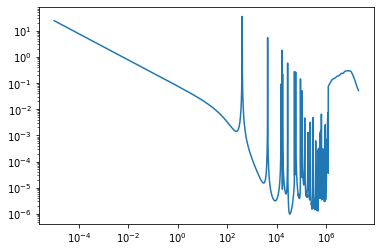

In [41]:
plt.loglog(endf_cl.Energy, endf_cl.Data)

In [42]:
# Loading LBNL new chlorine measurments
new_data = endf_utils.load_new("../EXFOR/New_Data/Chlorine_Data/new_cl_np.csv")

../EXFOR/New_Data/Chlorine_Data/new_cl_np.csv
Finish reading ENDF data with shape:  (12, 4)


# Exploratory Data Analysis

Let us study the dataset and analyze the distributions.

In [43]:
sns.set(font_scale=1)
sns.set_style("white")

In [44]:
# Setting up the path where our figures will be stored
figure_dir = "../Figures/EXFOR_N/"

## Atomic Mass, Protons, and Neutrons

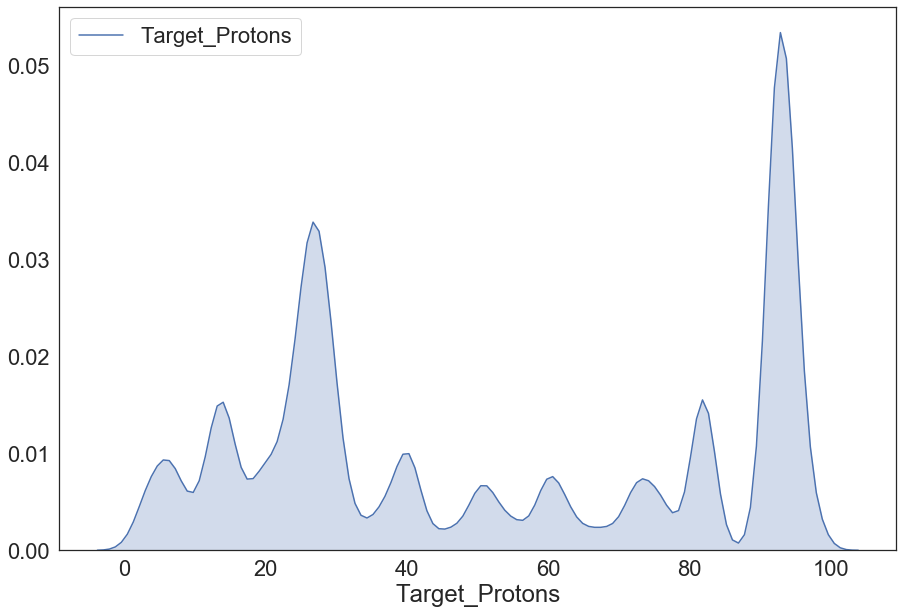

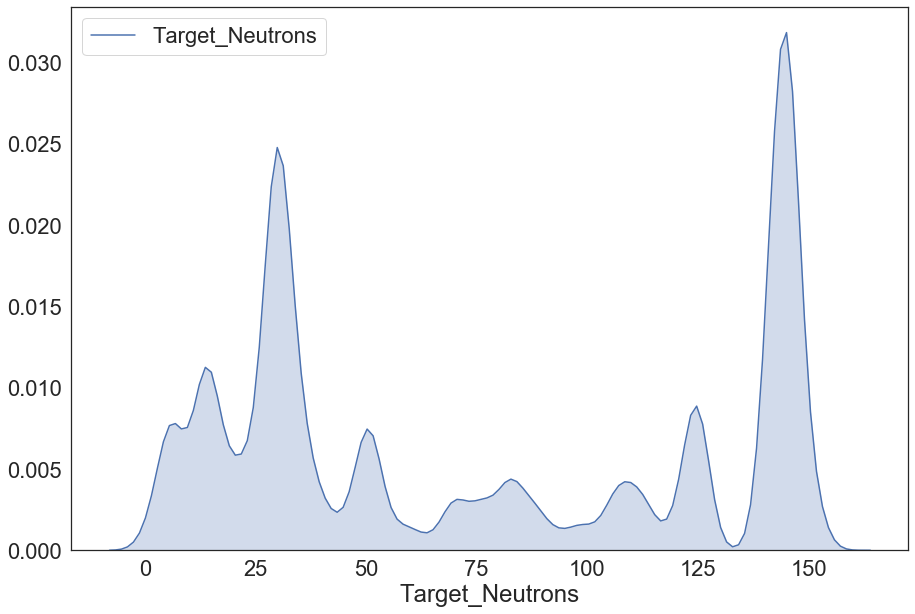

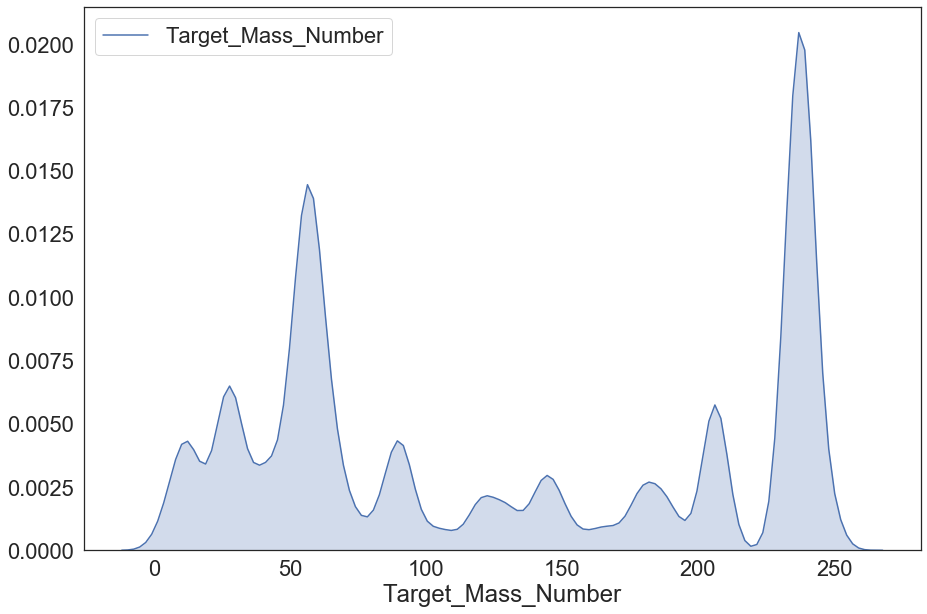

In [17]:
for i in ["Target_Protons", "Target_Neutrons", "Target_Mass_Number"]:
    kwarg = {"xlabel":i,  "path":figure_dir+'EXFOR_' + i + '_Dist.svg'}
    plot_utils.kdeplot(df[i], save=True, **kwarg)

# Institute, Reaction Types, and Isotopes

We can see by the distributions that the majority of the measurments have been made at Oak Ridge National Laboratory's LINAC facility. 

The majority of the measurments in the EXFOR dataset are (n,tot) followed by (n,g) and (n,f). Other reaction types that have been measured are Inelastic and Elastic Scattering and in lesser extent (n,p) and (n,a) reaciton types.

As for Isotopes, Fe-56, Pu-239, U-235, 238U 233U Al-27 Np-237, 91Zr cover the majority of the measruments here.

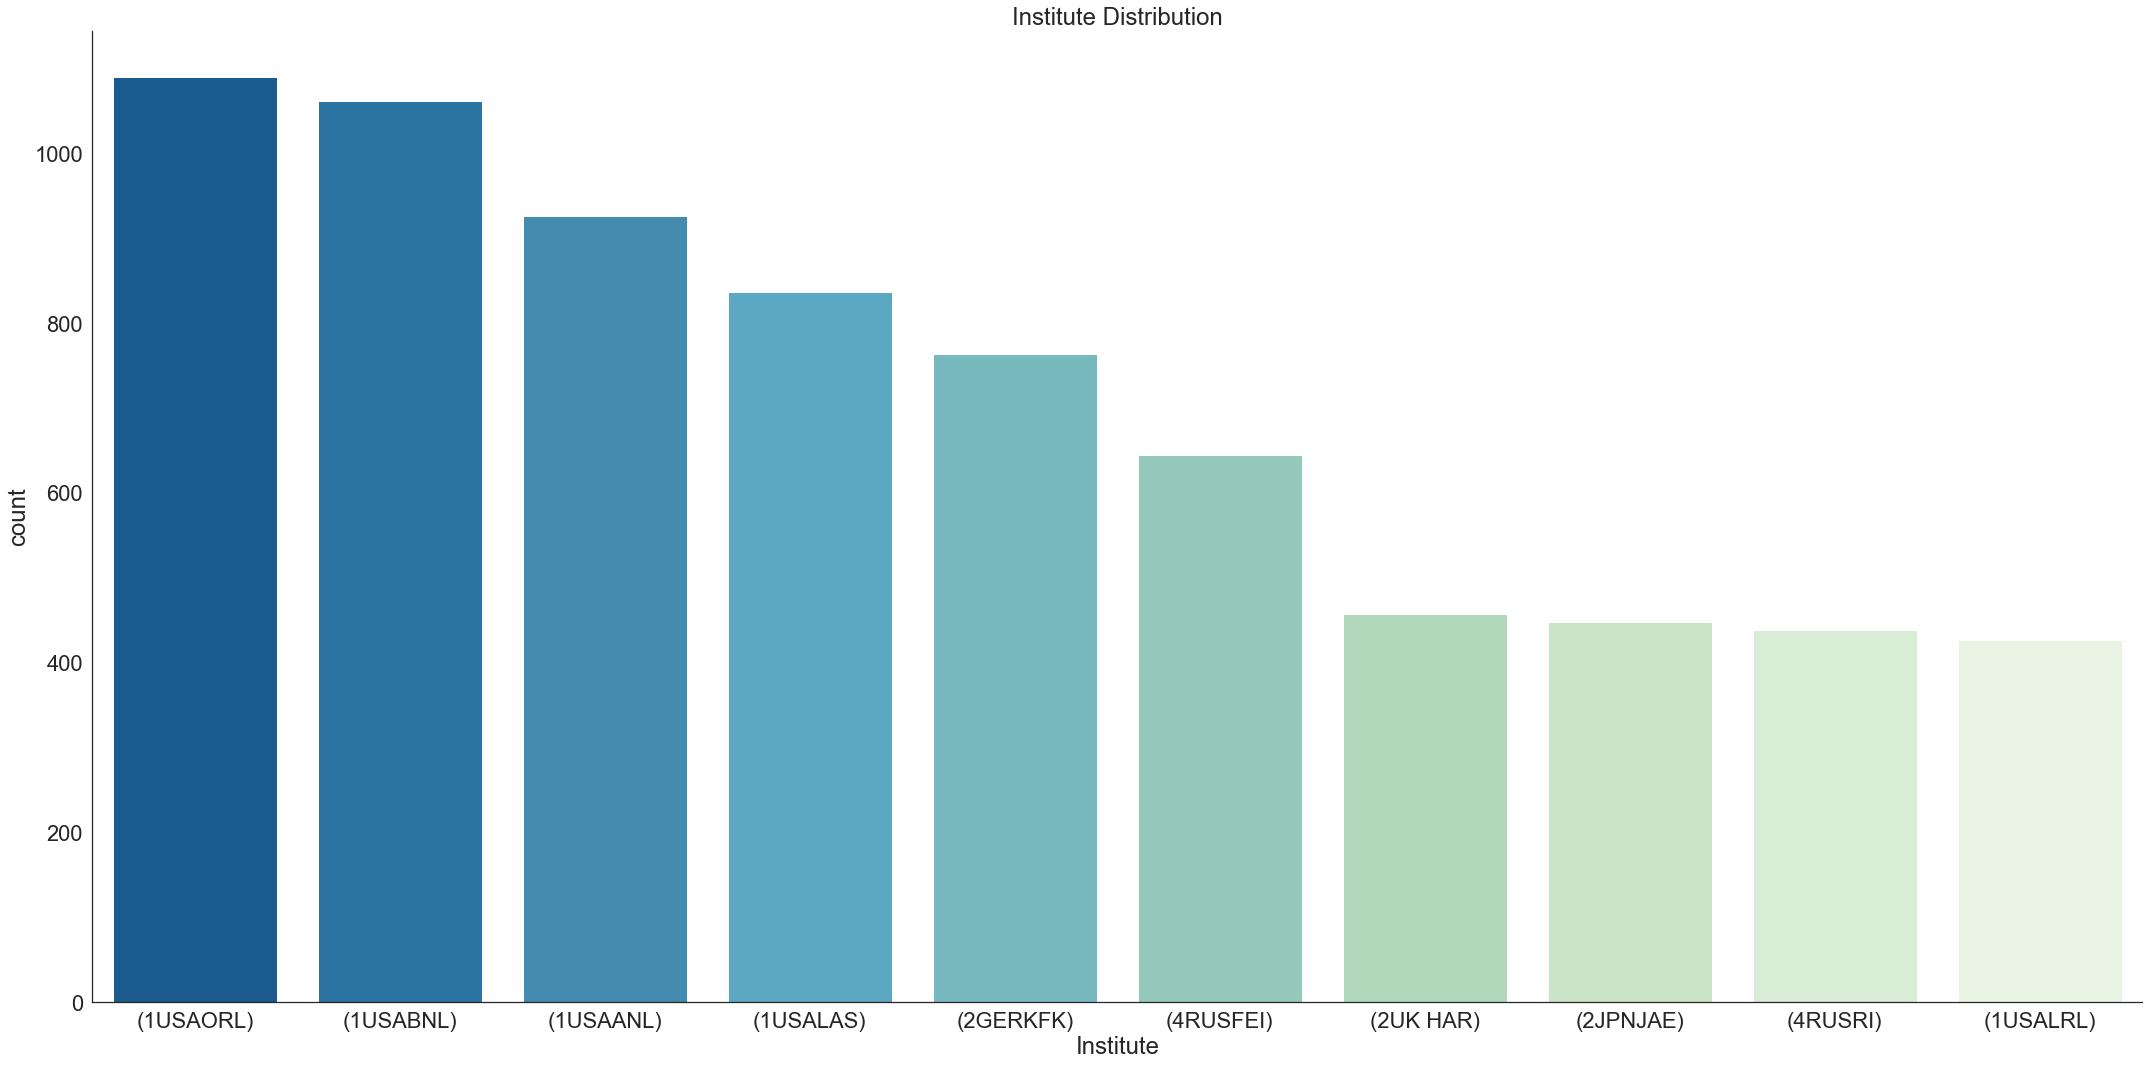

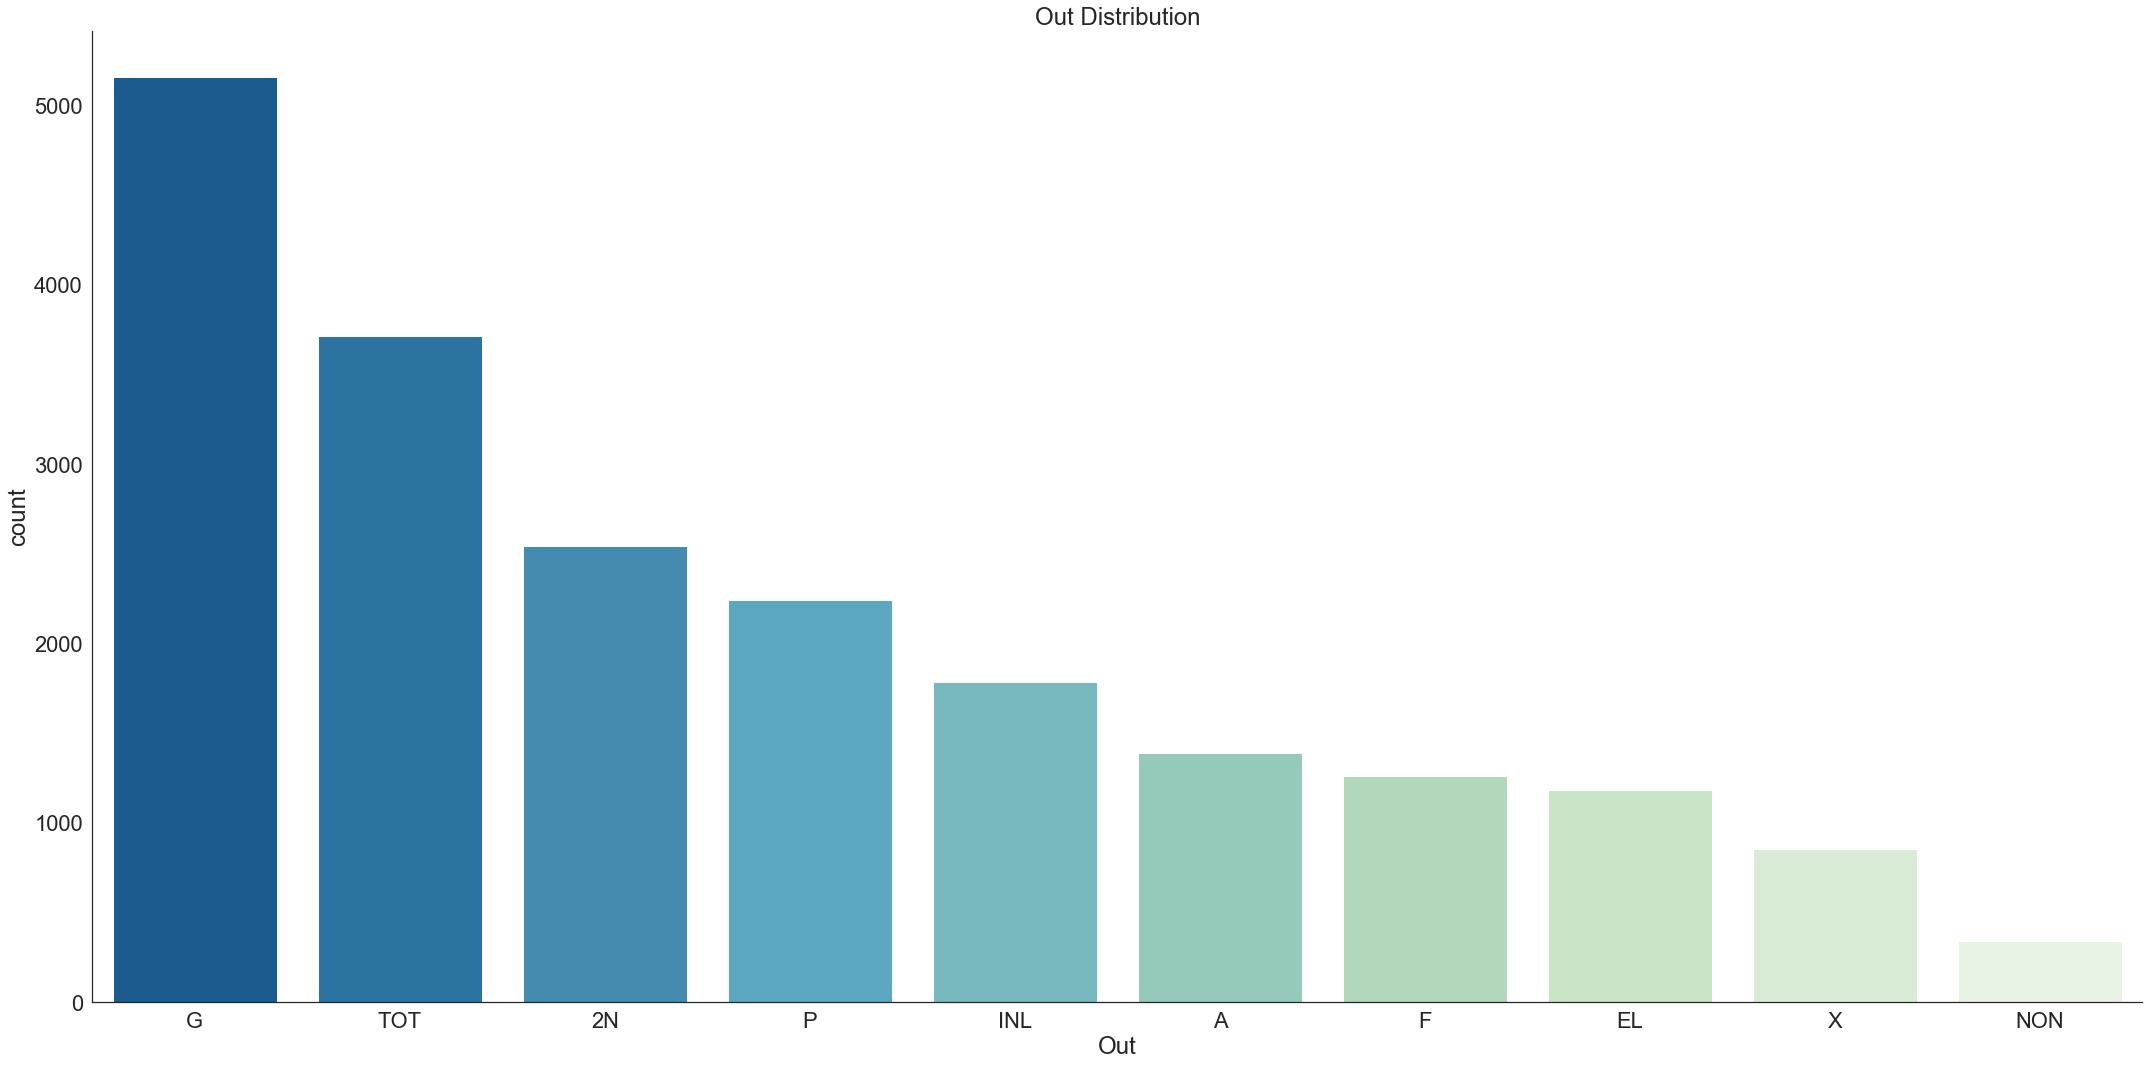

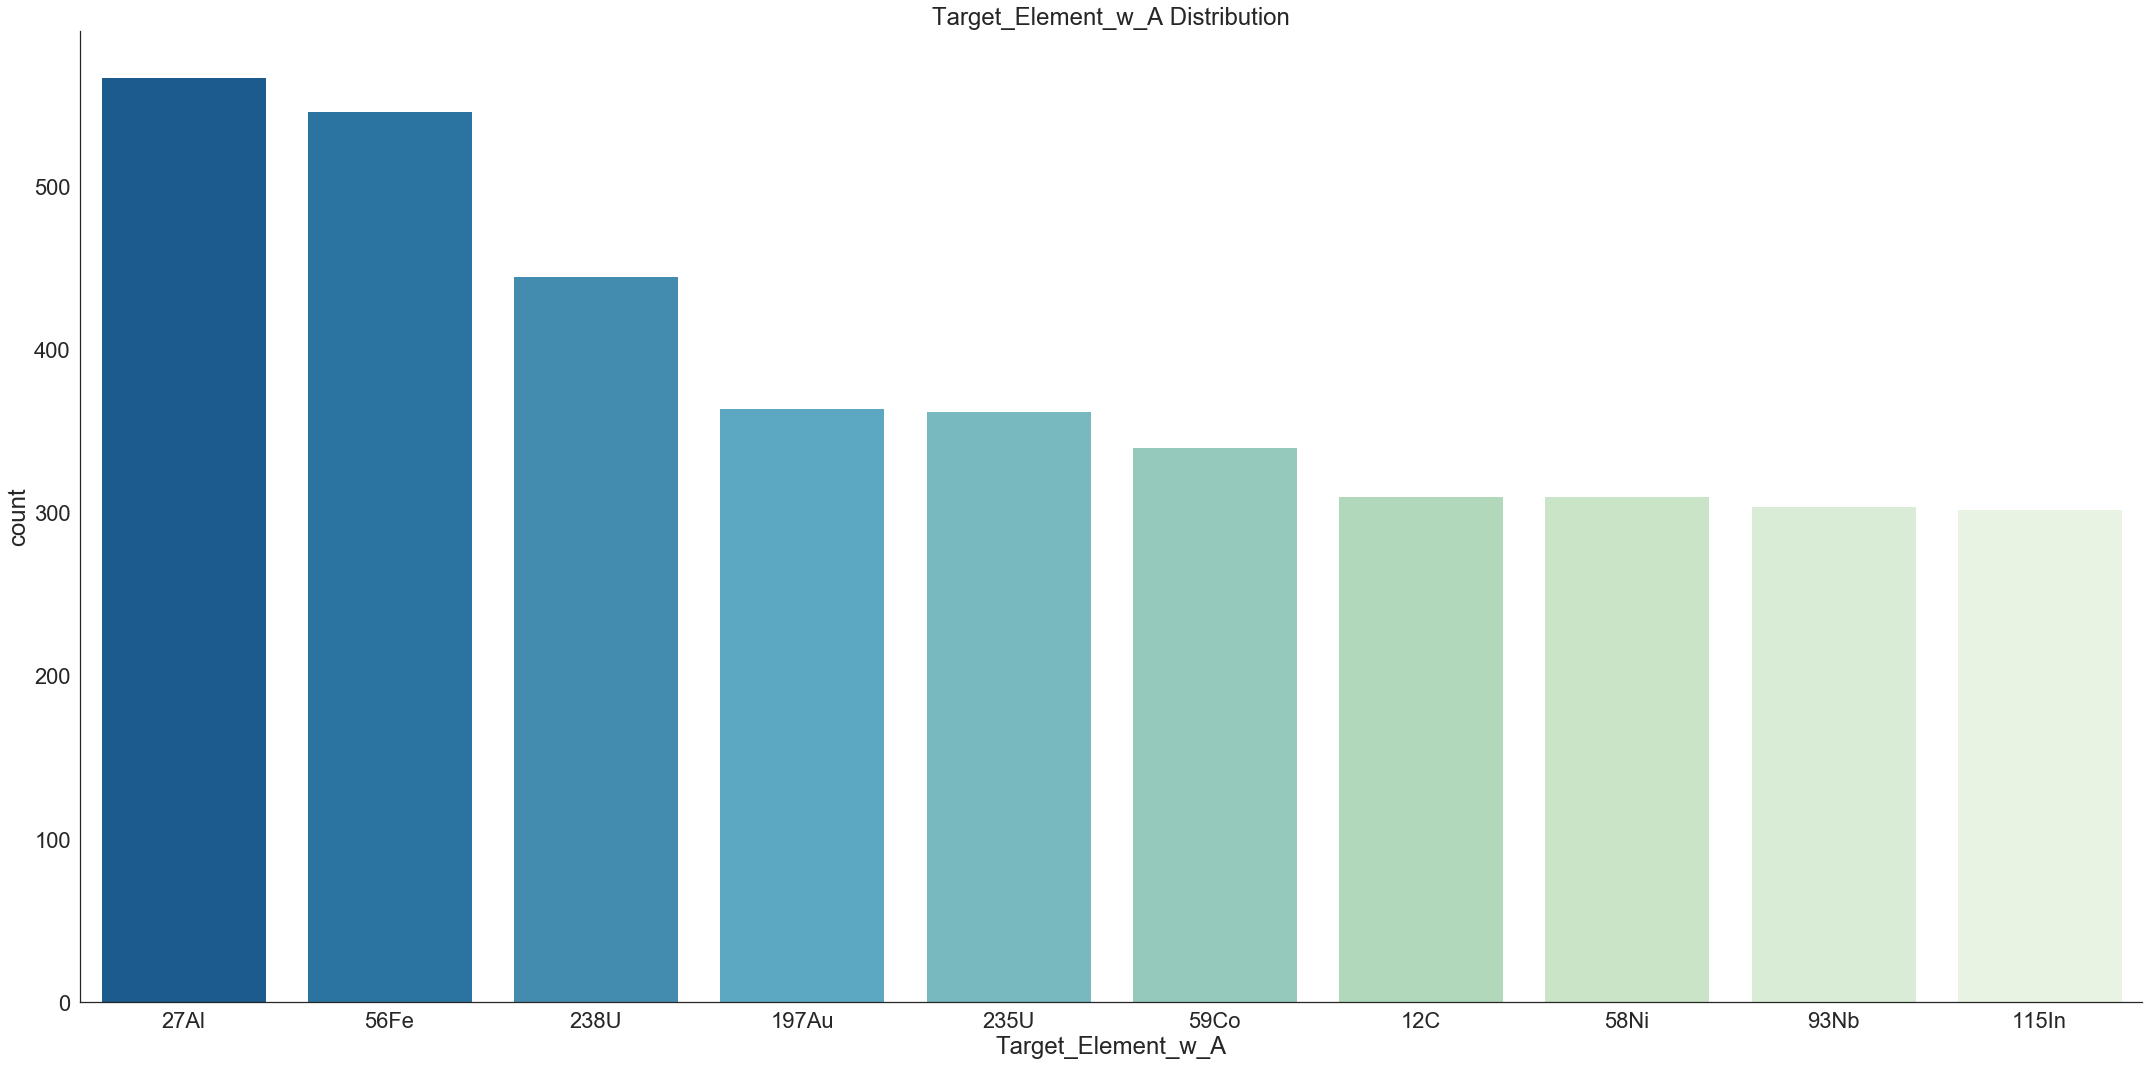

In [18]:
cat_cols_plot = ["Institute", "Out", "Target_Element_w_A"]
plot_utils.cat_plot(cat_cols_plot, df, 'Reference', save=True, path=figure_dir + "EXFOR")

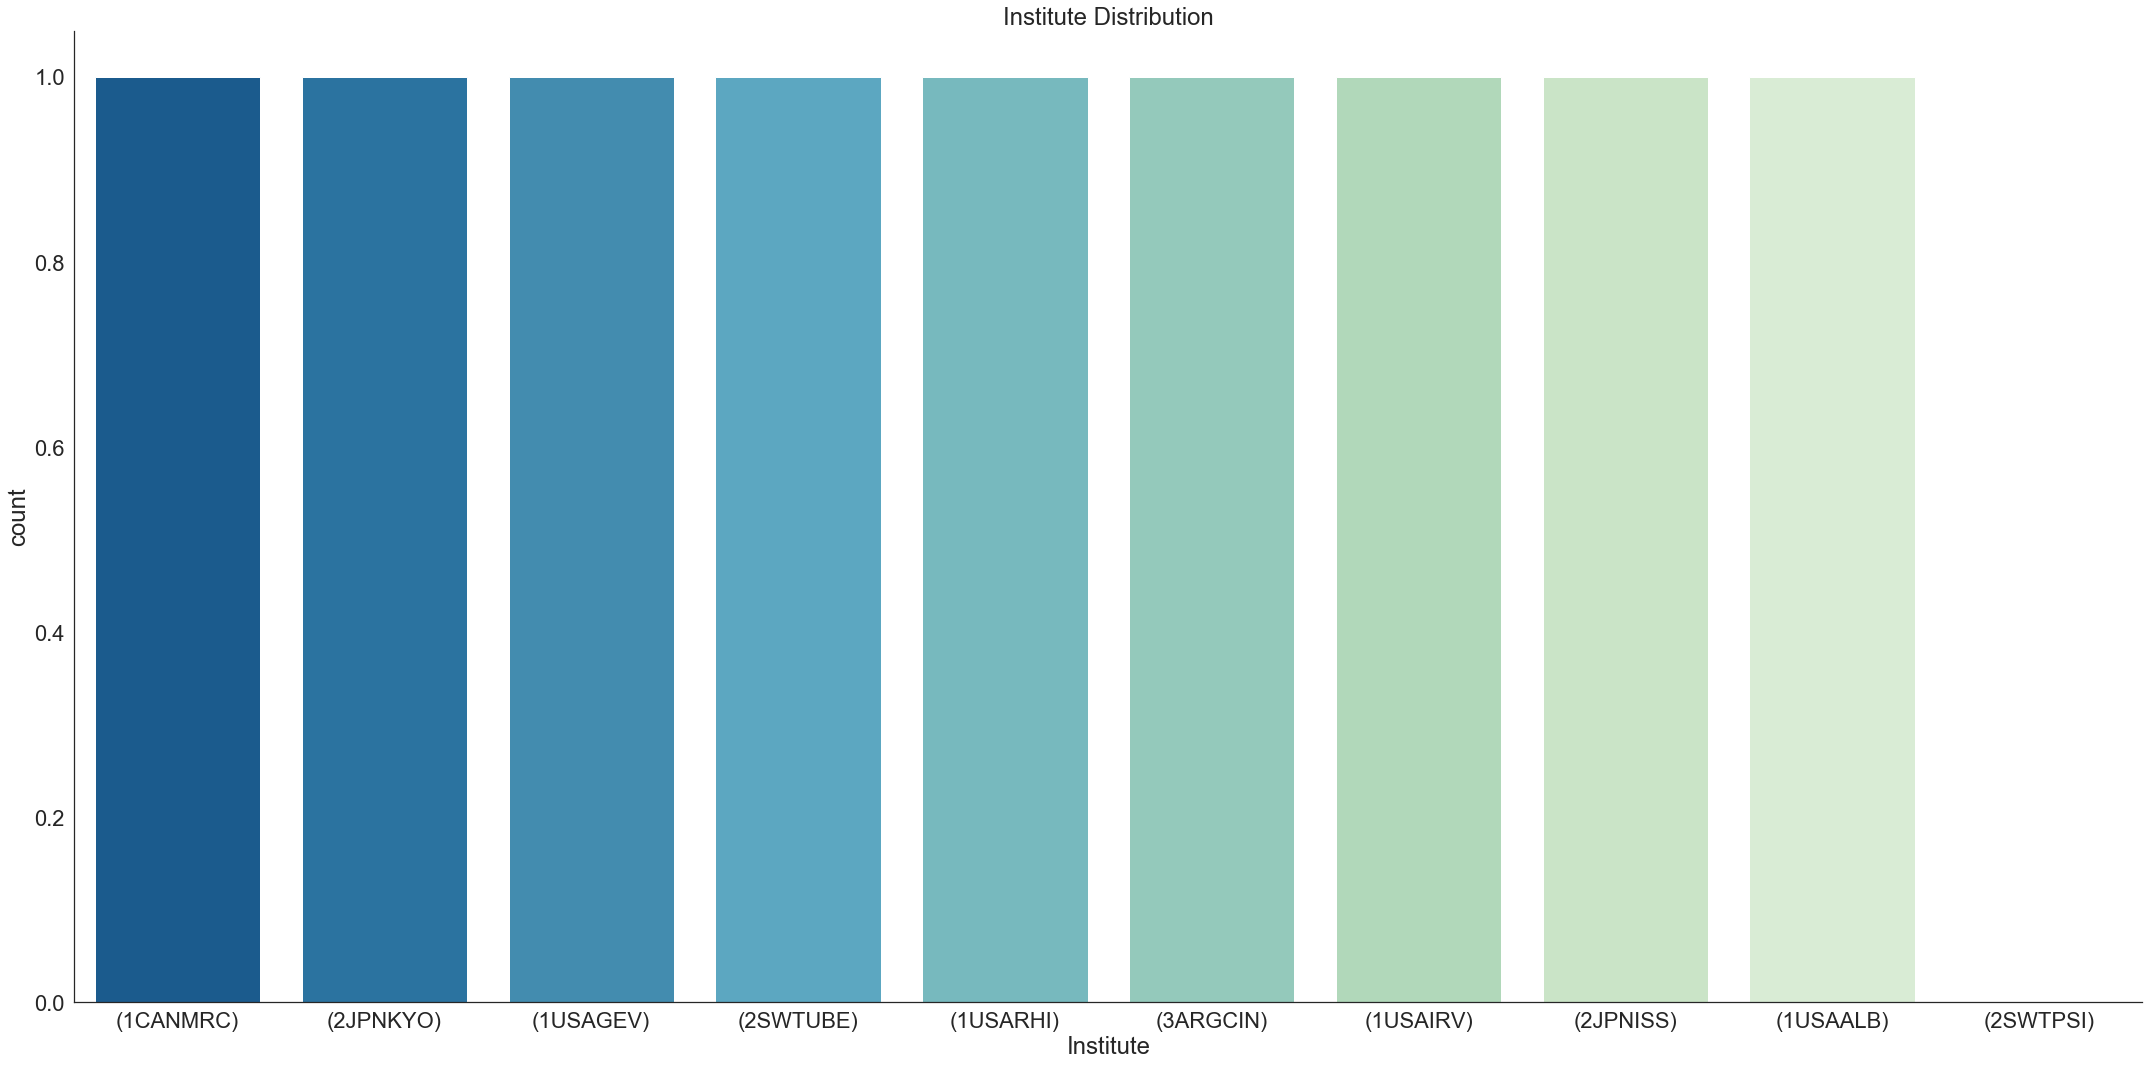

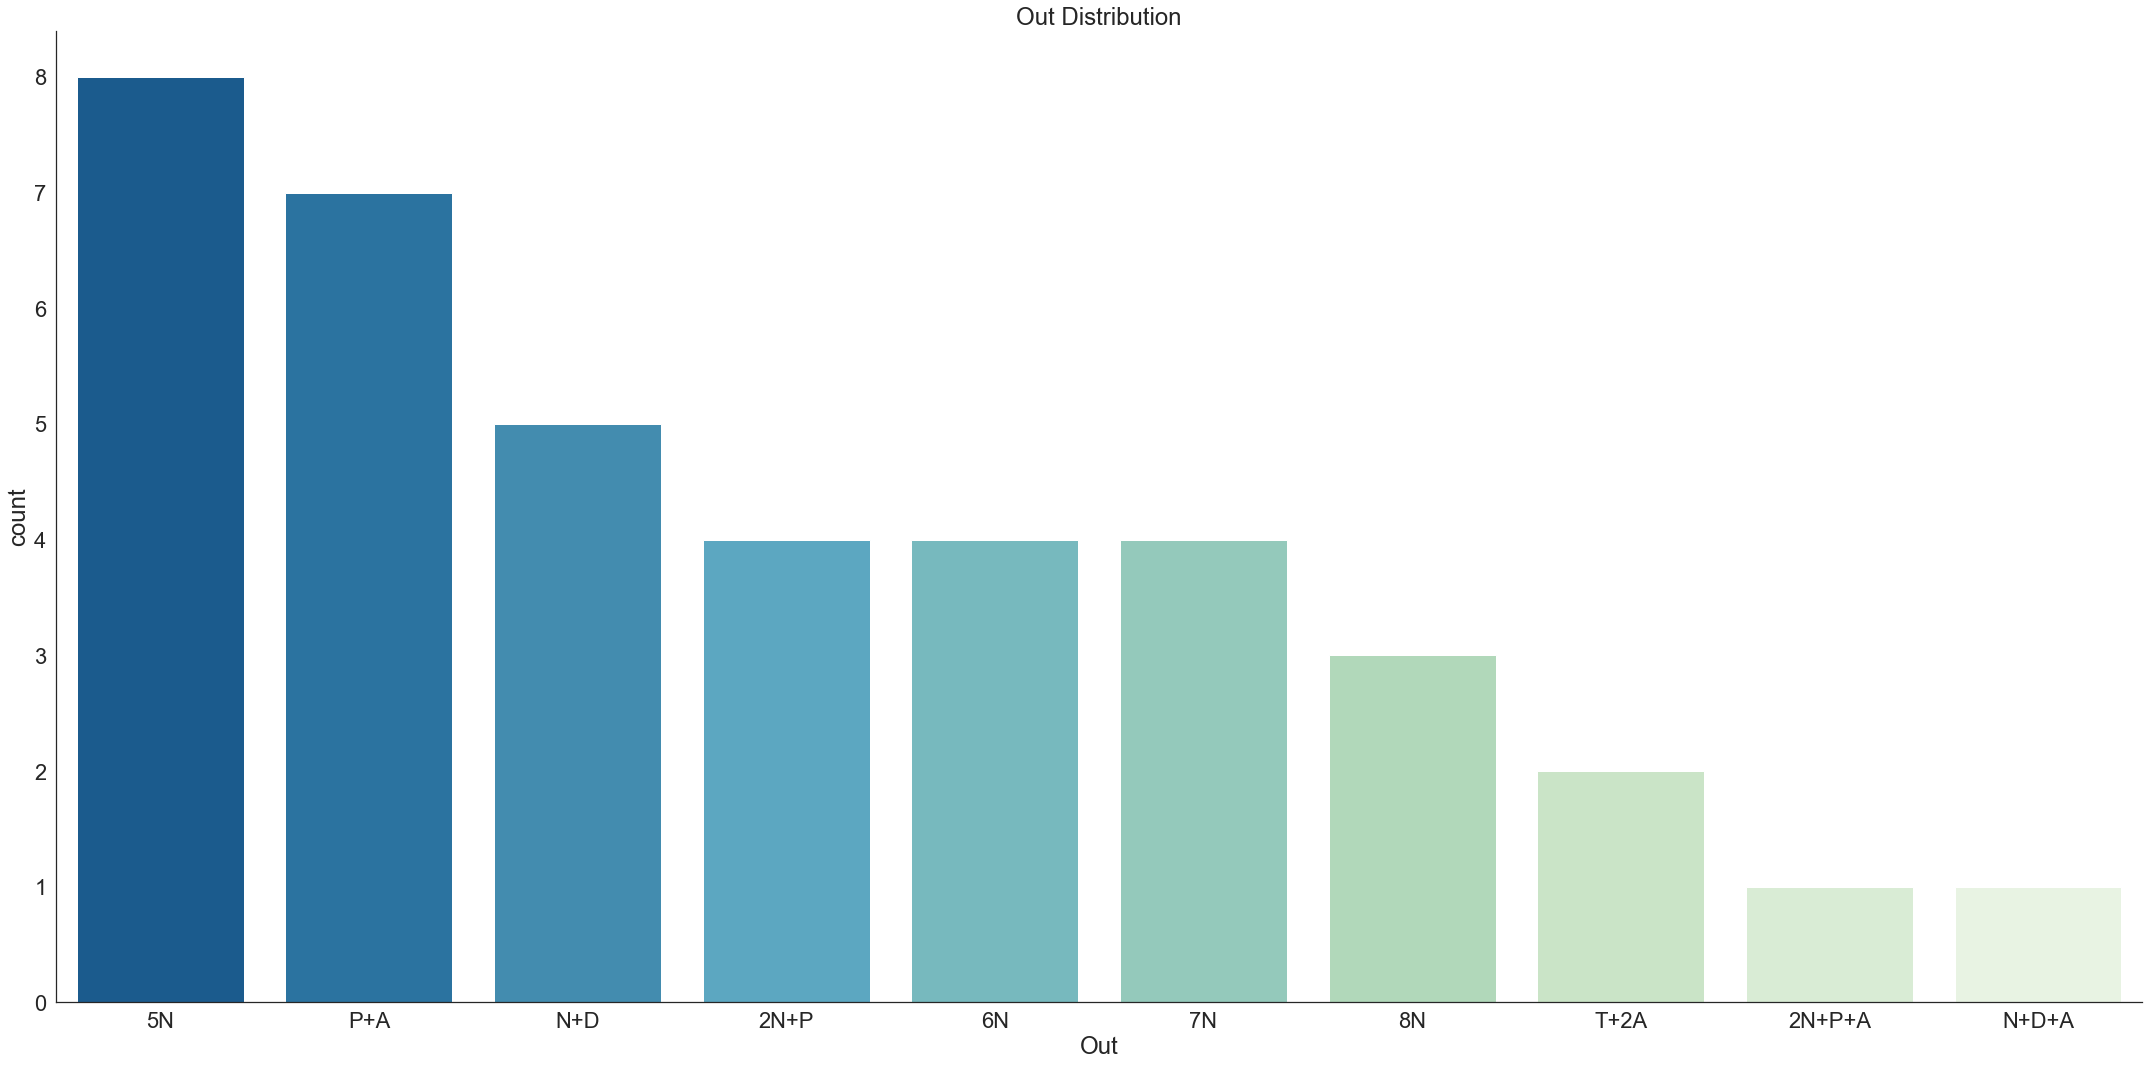

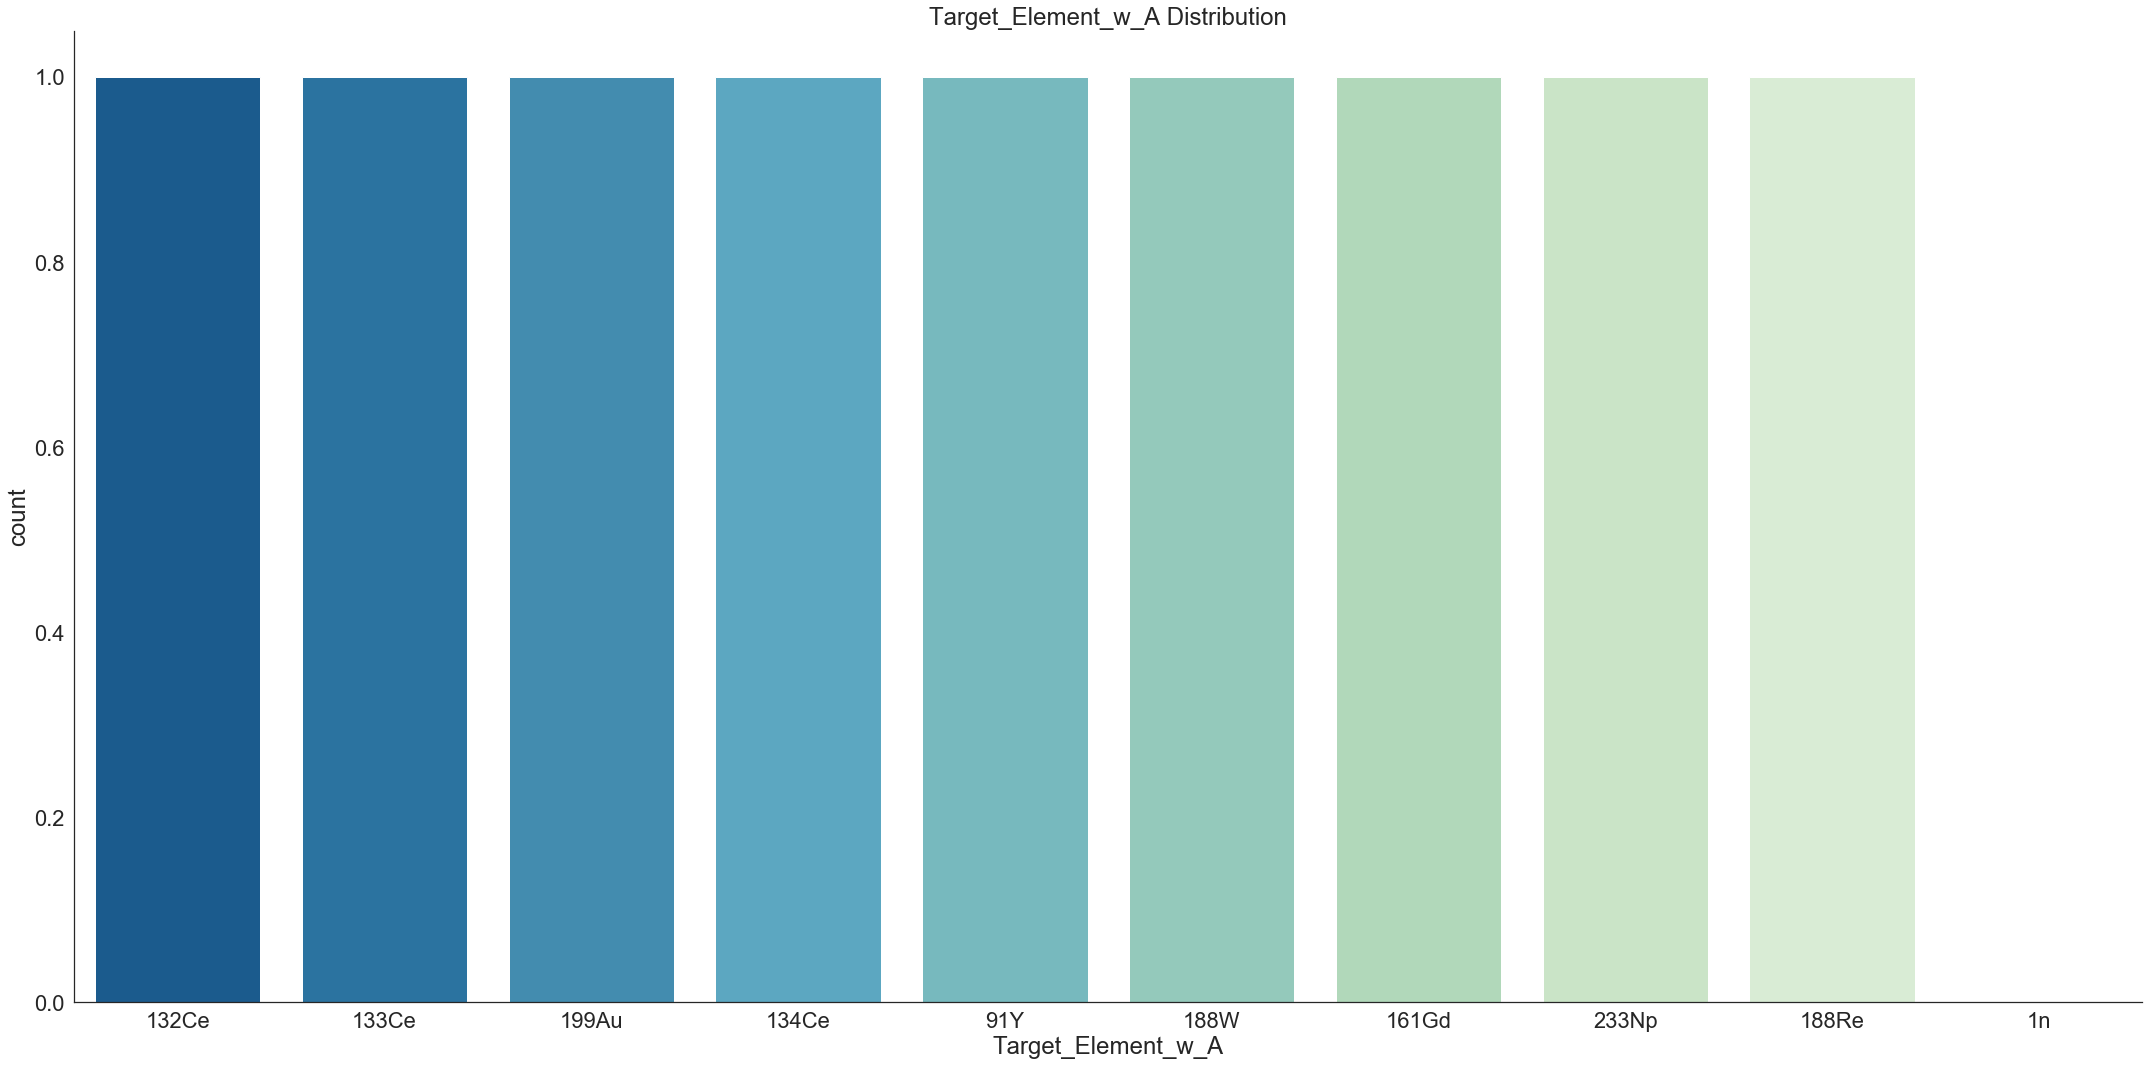

In [19]:
cat_cols_plot = ["Institute", "Out", "Target_Element_w_A"]
plot_utils.cat_plot(cat_cols_plot, df, 'Reference', reverse=True, save=True, path=figure_dir + "EXFOR")

# Year

In [24]:
sns.set(font_scale=1)
sns.set_style("white")

In [21]:
campaigns = df[['Year', 'Title']].groupby(['Year']).agg(['count']).reset_index().sort_values(by="Year")
campaigns.columns = ["Year", "Counts"]

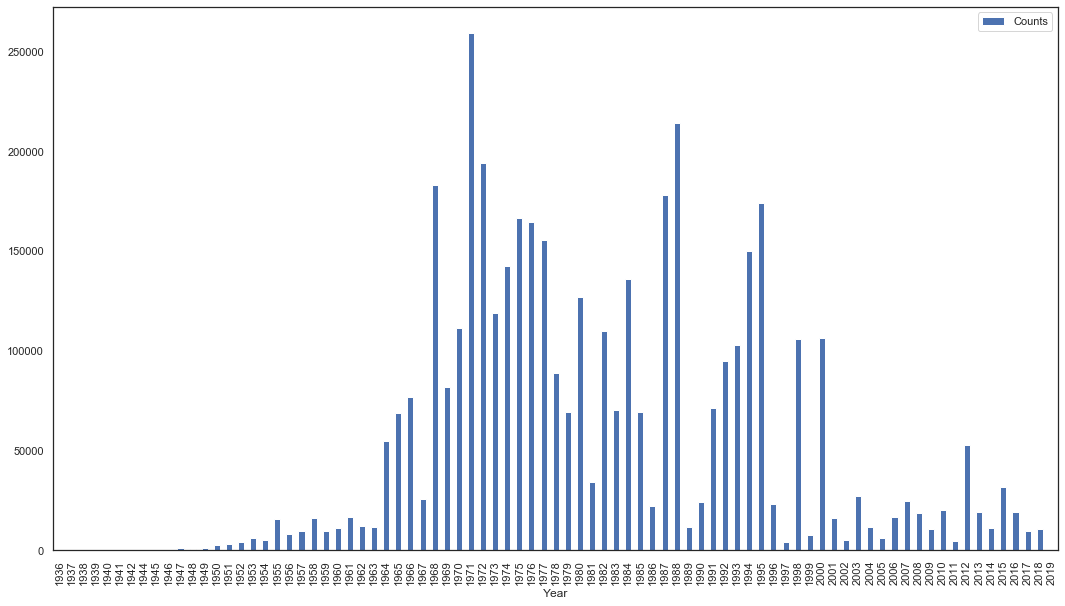

In [25]:
campaigns.plot(x="Year", y="Counts", kind='bar', figsize=(18,10))
plt.savefig(figure_dir + 'EXFOR_experiments_year.svg', bbox_inches='tight')

# Energy Distribution

In [27]:
df.Energy.max()/1E6

30000.0

In [28]:
# The max seems way to high, what experiment is it refering to?
crazy_energy_point = df[df.Energy == df.Energy.max()]
crazy_energy_point

,Target_Meta_State,MT,Energy,dEnergy,Data,dData,ELV/HL,dELV/HL,I78,EntrySubP,Target_Protons,Product_Meta_State,EXFOR_Status,Frame,Reaction_Notation,Title,Year,Institute,Date,Reference,Out,Target_Neutrons,Target_Mass_Number,Target_Element,Target_Flag,Target_Element_w_A,Target_Radius,Target_Neut_Rad_Ratio,Target_Origin,Target_Mass_Excess,Target_dMass_Excess,Target_Binding_Energy,Target_dBinding_Energy,Target_B_Decay_Energy,Target_dB_Decay_Energy,Target_Atomic_Mass_Micro,Target_dAtomic_Mass_Micro,Target_S(2n),Target_dS(2n),Target_S(2p),Target_dS(2p),Target_S(n),Target_dS(n),Target_S(p),Target_dS(p),Compound_Neutrons,Compound_Mass_Number,Compound_Protons,Compound_EL,Compound_Origin,Compound_Mass_Excess,Compound_dMass_Excess,Compound_Binding_Energy,Compound_dBinding_Energy,Compound_B_Decay_Energy,Compound_dB_Decay_Energy,Compound_Atomic_Mass_Micro,Compound_dAtomic_Mass_Micro,Compound_S(2n),Compound_dS(2n),Compound_S(2p),Compound_dS(2p),Compound_S(n),Compound_dS(n),Compound_S(p),Compound_dS(p)
8837,All,4,3.000000e+10,2.060794e+08,0.035,0.011,0.0,0.0,Other,31113,1,All,Other,L,"1-H-1(N,INL)1-H-1,,SIG",Inelastic (n-p) cross section at 30 GeV,1962,(3HUNKFI),20090901,"G.Bozoki+ Jour. Nuclear Physics Vol.33, p.236,...",INL,0,1,H,I,1H,1.25,0.64,Other,7288.97061,0.00009,0.0,0.0,18244.328,289.9558,1.007825e+06,0.00009,2025.412,292.506,13771.880283,158.524008,1096.973333,256.595,0.0,0.0,1,2,1,H,Other,13135.72176,0.00011,1112.283,0.0,18244.328,289.9558,2.014102e+06,0.00012,2025.412,292.506,13771.880283,158.524008,2224.57,0.0,2224.57,0.0


In [29]:
# Getting rid of water_points
print(df.shape)
df = df[~df.Reaction_Notation.str.contains("WTR")]
df = df[~df.Title.str.contains("DERIV")]
print(df.shape)

(4254661, 66)
(4254661, 66)


It is a valid experiment per the title. If we plot the energy we will see that is highly skewed to the left which makes sense since most of our measurments are at room temperature 0.025 eV. However ML models perfor better in unskewed datasets.

In [30]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PowerTransformer

In [31]:
# # Let us save our energy points in an array for analysis
# energy = ((df.sort_values(by="Energy").Energy) * 1E-6)
# energy_l15 = energy[energy < 20]

energy = ((df[df.Energy < 2.0E7].sort_values(by="Energy").Energy))

In [48]:
energy_power_transform = PowerTransformer().fit_transform(energy.values.reshape(-1, 1))
energy_robust_scaler = RobustScaler().fit_transform(energy.values.reshape(-1, 1))
energy_min_max = MinMaxScaler().fit_transform(energy.values.reshape(-1, 1))
energy_standard = StandardScaler().fit_transform(energy.values.reshape(-1, 1))
energy_log = np.log10(energy.values.reshape(-1, 1))

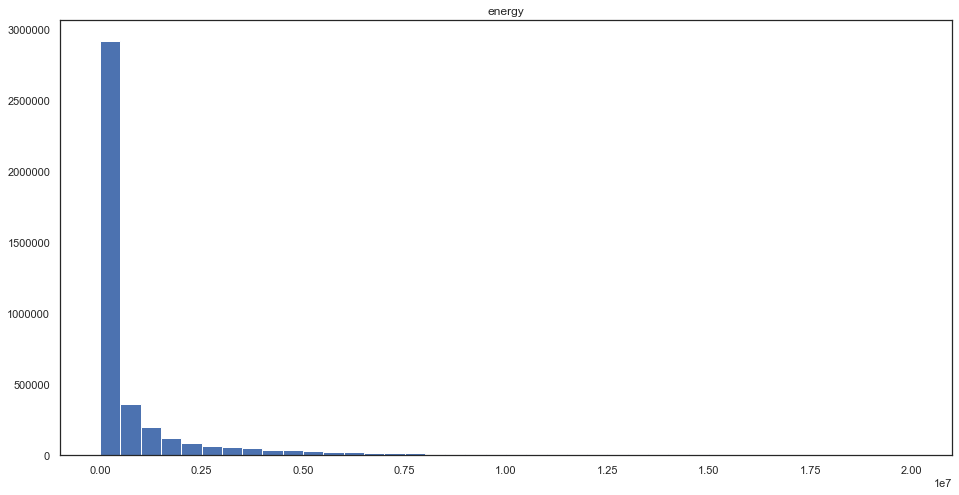

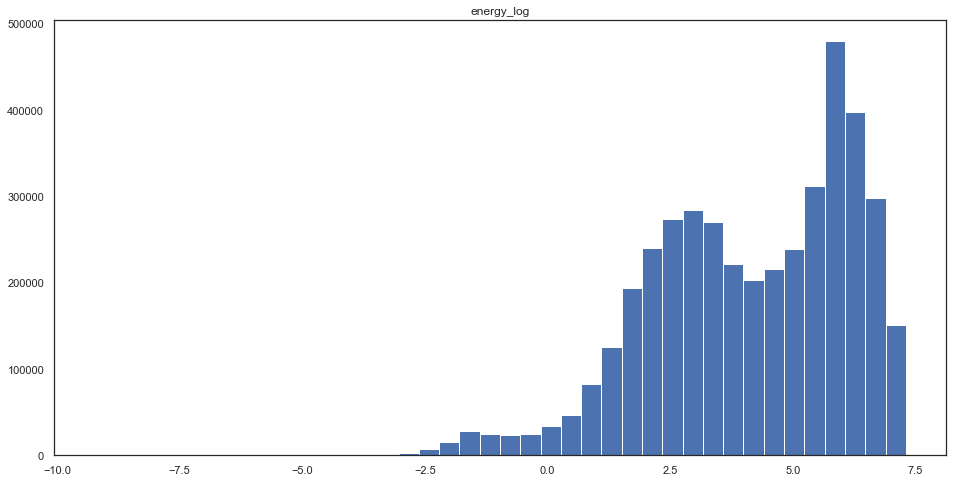

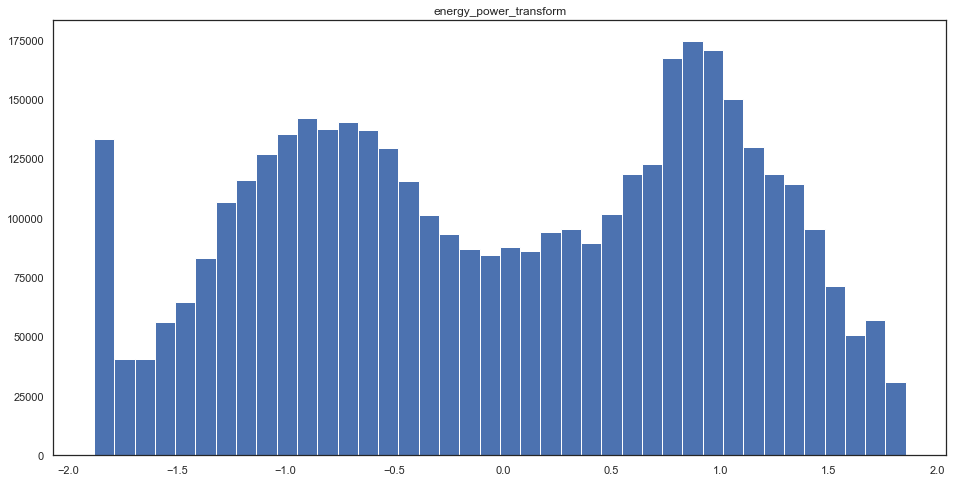

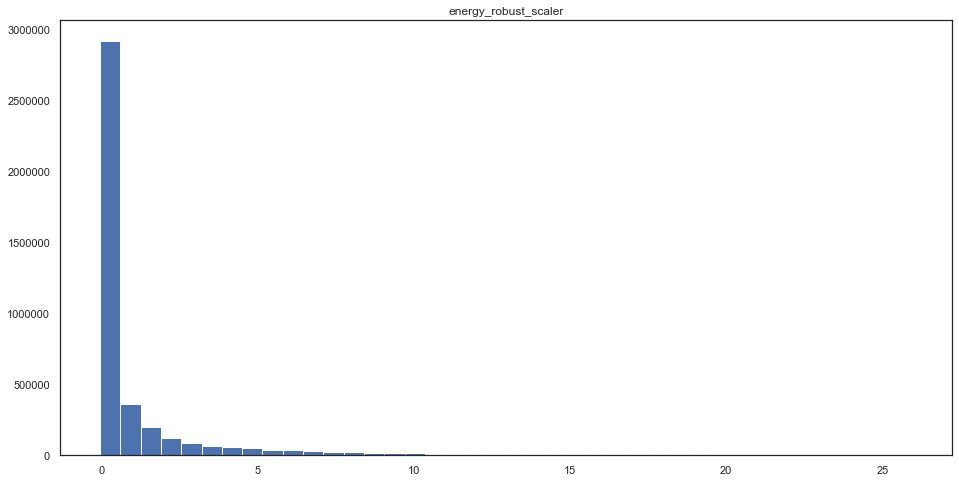

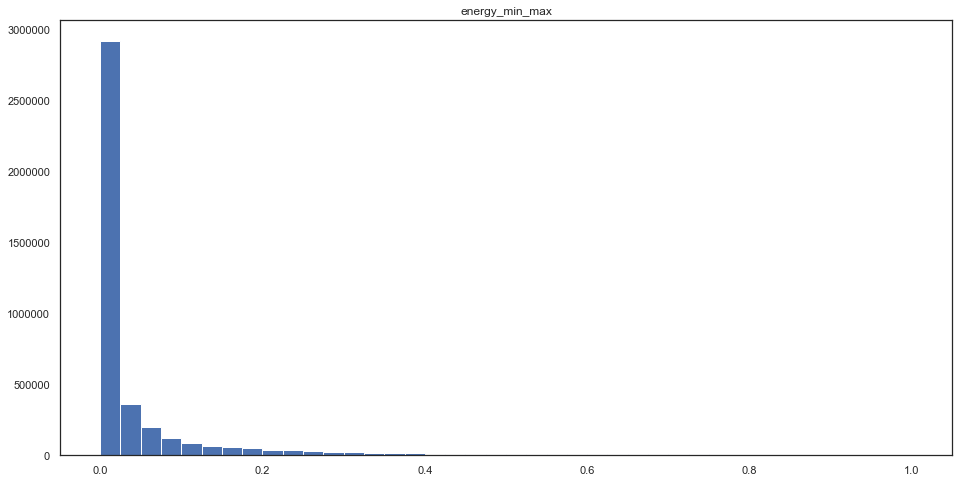

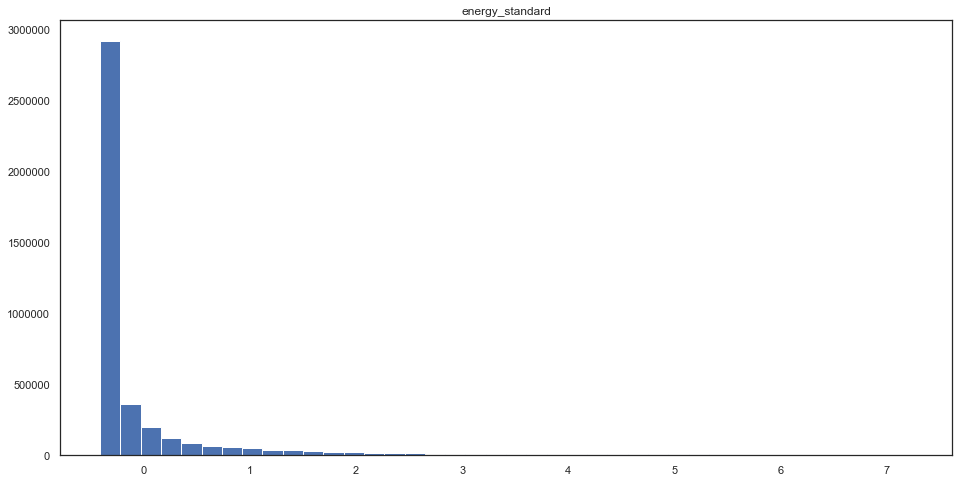

In [52]:
x = 0
en_labels = ["energy", "energy_log", "energy_power_transform", 
             "energy_robust_scaler", "energy_min_max", "energy_standard"]
for i in [energy, energy_log, energy_power_transform, energy_robust_scaler, energy_min_max, energy_standard]:
    plt.figure(figsize=(16,8))
    plt.hist(i, bins=40)
    plt.savefig(figure_dir + 'EXFOR_{}.svg'.format(en_labels[x]), bbox_inches='tight')
    plt.title(en_labels[x])
    plt.show()
    x = x + 1

In [49]:
energy_log_standard = StandardScaler().fit_transform(energy_log)
energy_power_standard = StandardScaler().fit_transform(energy_power_transform)

In [ ]:
x = 0
en_labels = ["energy", "energy_log", "energy_power_transform", 
             "energy_robust_scaler", "energy_min_max", "energy_standard"]
for i in [energy, energy_log, energy_power_transform, energy_robust_scaler, energy_min_max, energy_standard]:
    plt.figure(figsize=(16,8))
    plt.hist(i, bins=40)
    plt.savefig(figure_dir + 'EXFOR_{}.svg'.format(en_labels[x]), bbox_inches='tight')
    plt.title(en_labels[x])
    plt.show()
    x = x + 1

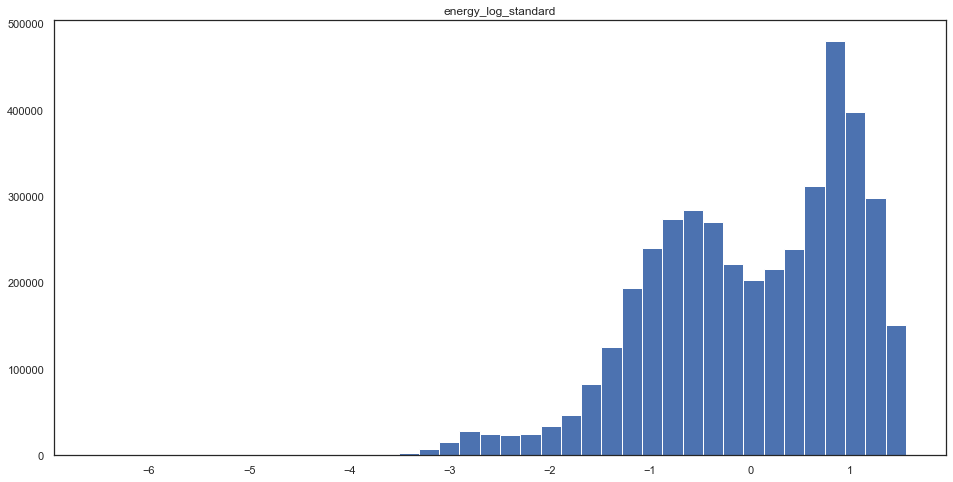

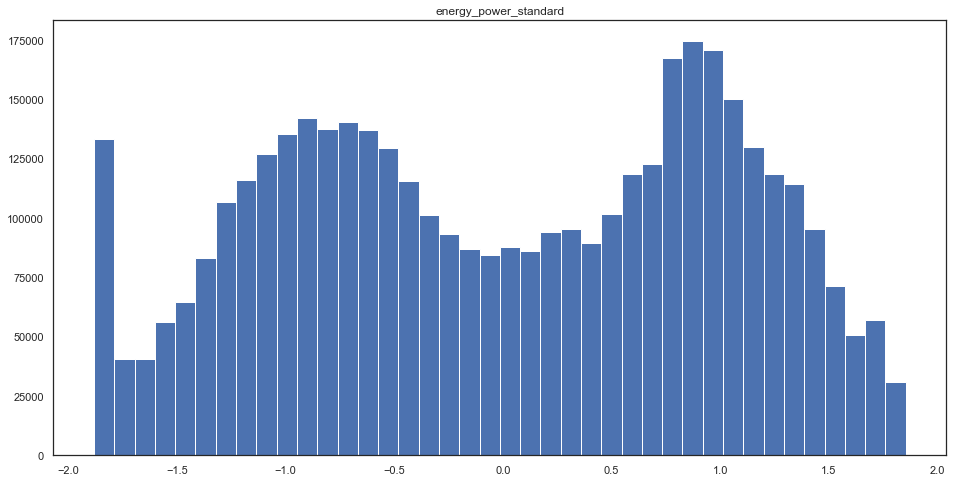

In [53]:
x = 0
en_labels = ["energy_log_standard", "energy_power_standard"]
for i in [energy_log_standard, energy_power_standard]:
    plt.figure(figsize=(16,8))
    plt.hist(i, bins=40)
    plt.savefig(figure_dir + 'EXFOR_{}.svg'.format(en_labels[x]), bbox_inches='tight')
    plt.title(en_labels[x])
    plt.show()
    x = x + 1

# Visualizing Cross Sections

In [45]:
# %matplotlib qt
# import matplotlib.pyplot as plt

Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (215, 66)
ENDF vs EXFOR:
The MSE is:  1.2276432471030905
The MAE is:  0.15847930495871088
NEW DATA: ENDF vs EXFOR:
The MSE is:  0.02009284974699579
The MAE is:  0.14145558333333333


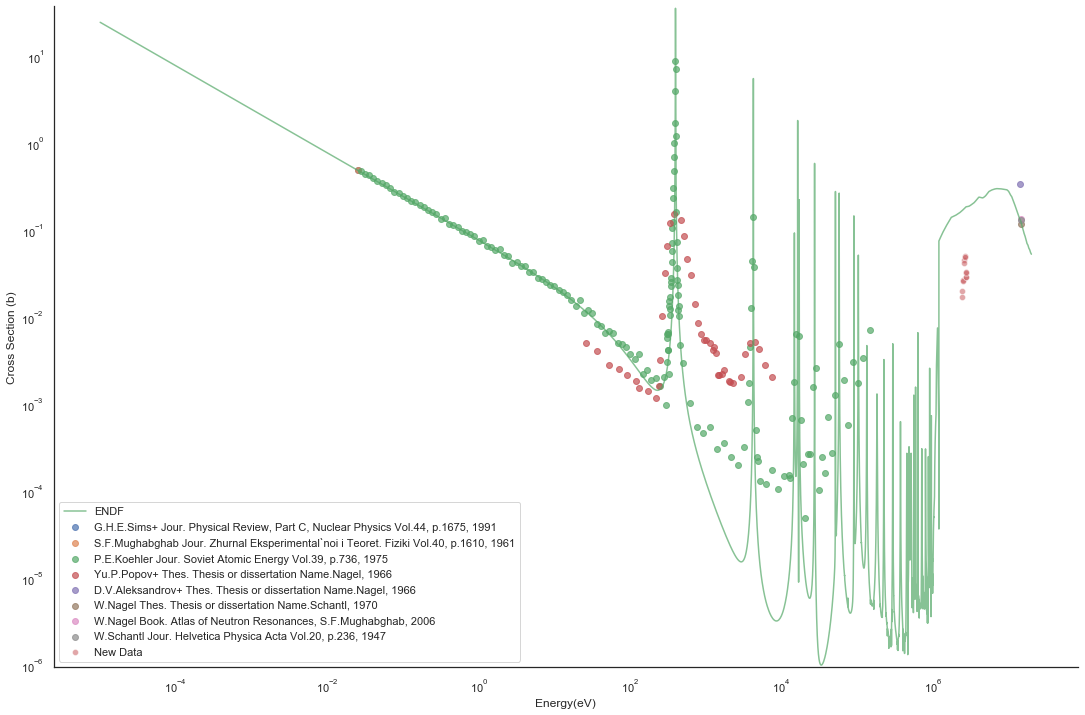

In [46]:
kwargs = {"nat_iso":"I", "one_hot":False, "alpha":0.7, "legend":True, "interpolate":False, 
          "log_plot":True, "ref":True}

cl_exfor_endf = exfor_utils.plot_exfor_w_references(df, 17, 35, "103", 
                                                    new_data=new_data, 
                                                    endf=endf_cl, 
                                                    error=True, 
                                                    save=True, 
                                                    path=figure_dir, 
                                                    **kwargs)

Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (94661, 66)
ENDF vs EXFOR:
The MSE is:  315.2368512809786
The MAE is:  7.135783211874852


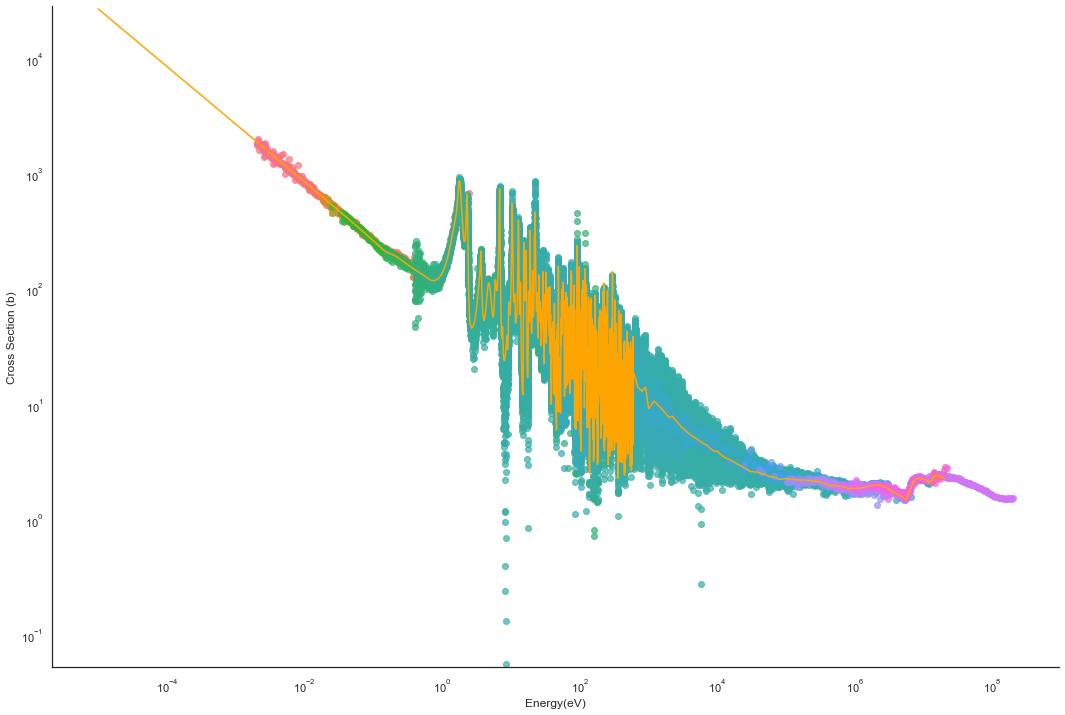

In [47]:
kwargs = {"nat_iso":"I", "one_hot":False, "alpha":0.7, "legend":False, "interpolate":False, 
          "log_plot":True, "ref":True}

u_exfor_endf = exfor_utils.plot_exfor_w_references(df, 92, 233, "18", 
                                                   endf=endf_u, 
                                                   error=True, 
                                                   save=True, 
                                                   path=figure_dir, 
                                                   **kwargs)

In [207]:
importlib.reload(exfor_utils)
importlib.reload(exfor_plot)
importlib.reload(endf_utils)
importlib.reload(plot_utils)
importlib.reload(nuc_data)
print("Finish importing scripts.")

Finish importing scripts.


Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (94661, 66)


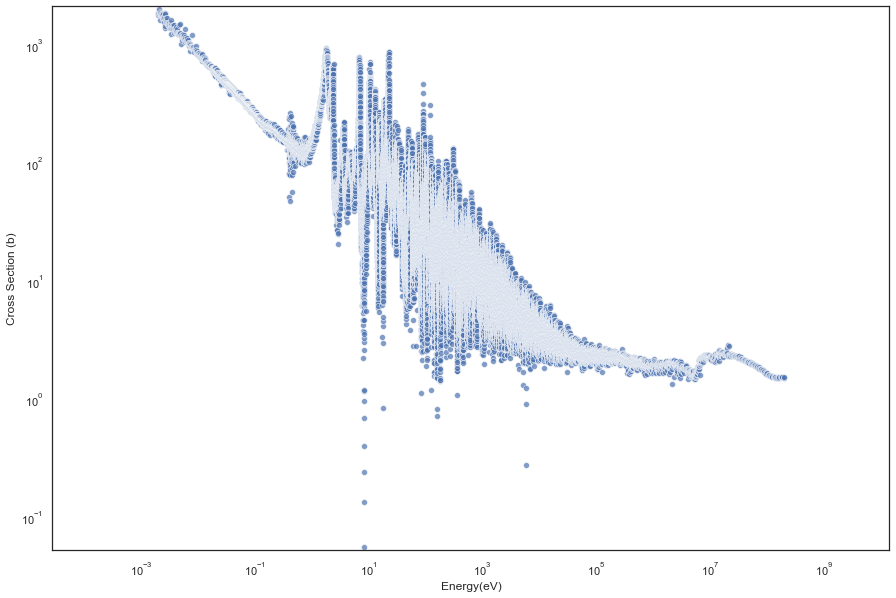

In [208]:
kwargs = {"nat_iso":"I", "one_hot":False, "alpha":0.7, "legend":False, "interpolate":False, 
          "log_plot":True, "ref":False}
u_exfor_endf = exfor_utils.plot_exfor_w_references(df, 92, 233, "18", 
                                                   # endf=endf_u, 
                                                   error=True, 
                                                   save=False, 
                                                   path=figure_dir, 
                                                   **kwargs)

In [109]:
# Loading U233 fission data
endf_u_mt2 = nuc_data.load_endf("U233", "MT002")

/Users/pedrovicentevaldez/Desktop/ML_Nuclear_Data/ML_Data/ENDF_neutrons/U233/endfb8.0/tables/xs/n-U233-MT002.endfb8.0
File does not exists.


Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (261, 66)
ENDF vs EXFOR:
The MSE is:  5.8934269689995045
The MAE is:  1.9899680268199231


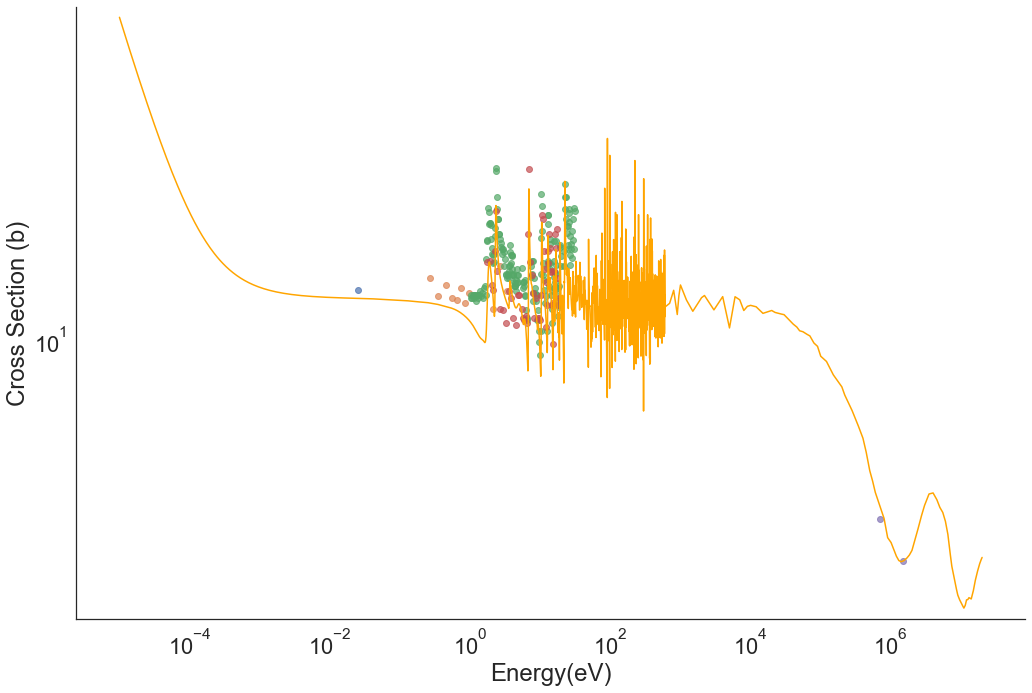

In [146]:
kwargs = {"nat_iso":"I", "one_hot":False, "alpha":0.7, "legend":False, "interpolate":False, "log_e":False, "ref":True}

u_exfor_endf = exfor_utils.plot_exfor_w_references(df, 92, 233, "2", endf=endf_u_mt2, error=True, 
                                    save=True, path=figure_dir, **kwargs)

# Numerical Features

Lets follow up with the Chlorine-35 (n,p) example.

In [66]:
uranium = df[(df["Target_Protons"] == 92) & (df["MT"] == "1") & (df["Target_Mass_Number"] == 235)].sort_values(
    by='Energy', ascending=False)

In [67]:
uranium.shape

(40253, 66)

In [69]:
chlorine = df[(df["Target_Protons"] == 17) & (df["MT"] == 103) & (df["Target_Mass_Number"] == 35)].sort_values(by='Energy', ascending=False)

In [117]:
chlorine.describe()

,Energy,dEnergy,Data,dData,ELV/HL,dELV/HL,Target_Protons,Year,Date,Target_Neutrons,Target_Mass_Number,Target_Radius,Target_Neut_Rad_Ratio,Target_Mass_Excess,Target_dMass_Excess,Target_Binding_Energy,Target_dBinding_Energy,Target_B_Decay_Energy,Target_dB_Decay_Energy,Target_Atomic_Mass_Micro,Target_dAtomic_Mass_Micro,Target_S(2n),Target_dS(2n),Target_S(2p),Target_dS(2p),Target_S(n),Target_dS(n),Target_S(p),Target_dS(p),Compound_Neutrons,Compound_Mass_Number,Compound_Protons,Compound_Mass_Excess,Compound_dMass_Excess,Compound_Binding_Energy,Compound_dBinding_Energy,Compound_B_Decay_Energy,Compound_dB_Decay_Energy,Compound_Atomic_Mass_Micro,Compound_dAtomic_Mass_Micro,Compound_S(2n),Compound_dS(2n),Compound_S(2p),Compound_dS(2p),Compound_S(n),Compound_dS(n),Compound_S(p),Compound_dS(p)
count,2.160000e+02,216.000000,216.000000,216.000000,216.0,216.0,216.0,216.000000,2.160000e+02,216.0,216.0,2.160000e+02,2.160000e+02,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,2.160000e+02,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.0,216.0,216.0,216.000,2.160000e+02,2.160000e+02,2.160000e+02,216.000,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,216.00,216.00,2.160000e+02,2.160000e+02,216.0,2.160000e+02,2.160000e+02
mean,2.746206e+05,3331.131388,0.168940,0.010491,0.0,0.0,17.0,1984.662037,1.993674e+07,18.0,35.0,4.088833e+00,1.956549e-01,-28940.556340,0.901059,8518.131541,0.021770,-5916.991437,1.645520,3.497109e+07,0.967523,24119.670213,1.485549,17280.916168,2.250758,12626.248752,1.180578,6386.111274,1.187365,19.0,36.0,17.0,-29522.005,3.600000e-02,8.521931e+03,1.000000e-03,709.535,4.500000e-02,3.596831e+07,3.800000e-02,2.122456e+04,0.05,19551.25,8.100000e-01,8.579790e+03,0.0,7.964770e+03,3.000000e-02
std,1.958895e+06,23749.179229,0.812348,0.053155,0.0,0.0,0.0,12.371071,4.075400e+04,0.0,0.0,1.780483e-15,5.564010e-17,1072.459992,12.728416,31.546375,0.305251,723.847195,14.204891,3.294205e+04,13.661145,487.347356,16.101220,393.821631,17.059583,272.058672,16.616031,224.881885,16.862755,0.0,0.0,0.0,0.000,1.391002e-17,3.646429e-12,4.346883e-19,0.000,6.955012e-18,1.493577e-08,6.955012e-18,3.646429e-12,0.00,0.00,3.338406e-16,3.646429e-12,0.0,2.734822e-12,1.043252e-17
min,2.530000e-02,0.000261,0.000048,0.000048,0.0,0.0,17.0,1961.000000,1.992020e+07,18.0,35.0,4.088833e+00,1.956549e-01,-29013.528000,0.035000,8056.642875,0.001000,-5966.243000,0.679000,3.496885e+07,0.038000,16990.315909,0.390000,17254.120000,1.090000,8646.330435,0.050000,6370.810000,0.040000,19.0,36.0,17.0,-29522.005,3.600000e-02,8.521931e+03,1.000000e-03,709.535,4.500000e-02,3.596831e+07,3.800000e-02,2.122456e+04,0.05,19551.25,8.100000e-01,8.579790e+03,0.0,7.964770e+03,3.000000e-02
25%,1.845750e+01,0.261210,0.002100,0.000380,0.0,0.0,17.0,1991.000000,1.992020e+07,18.0,35.0,4.088833e+00,1.956549e-01,-29013.528000,0.035000,8520.278000,0.001000,-5966.243000,0.679000,3.496885e+07,0.038000,24152.830000,0.390000,17254.120000,1.090000,12644.760000,0.050000,6370.810000,0.040000,19.0,36.0,17.0,-29522.005,3.600000e-02,8.521931e+03,1.000000e-03,709.535,4.500000e-02,3.596831e+07,3.800000e-02,2.122456e+04,0.05,19551.25,8.100000e-01,8.579790e+03,0.0,7.964770e+03,3.000000e-02
50%,3.511000e+02,6.011867,0.010100,0.001350,0.0,0.0,17.0,1991.000000,1.992020e+07,18.0,35.0,4.088833e+00,1.956549e-01,-29013.528000,0.035000,8520.278000,0.001000,-5966.243000,0.679000,3.496885e+07,0.038000,24152.830000,0.390000,17254.120000,1.090000,12644.760000,0.050000,6370.810000,0.040000,19.0,36.0,17.0,-29522.005,3.600000e-02,8.521931e+03,1.000000e-03,709.535,4.500000e-02,3.596831e+07,3.800000e-02,2.122456e+04,0.05,19551.25,8.100000e-01,8.579790e+03,0.0,7.964770e+03,3.000000e-02
75%,2.382000e+03,21.926103,0.073650,0.003500,0.0,0.0,17.0,1991.000000,1.992020e+07,18.0,35.0,4.088833e+00,1.956549e-01,-29013.528000,0.035000,8520.278000,0.001000,-5966.243000,0.679000,3.496885e+07,0.038000,24152.830000,0.390000,17254.120000,1.090000,12644.760000,0.050000,6370

We can explor correlation among features but as we know beforehand, cross section do not behave linearly. Let us use the chlorine 35 n,p cross sections as an example.

In [118]:
pd.DataFrame(chlorine.corr()).sort_values(by='Data', ascending=False).head()

,Energy,dEnergy,Data,dData,ELV/HL,dELV/HL,Target_Protons,Year,Date,Target_Neutrons,Target_Mass_Number,Target_Radius,Target_Neut_Rad_Ratio,Target_Mass_Excess,Target_dMass_Excess,Target_Binding_Energy,Target_dBinding_Energy,Target_B_Decay_Energy,Target_dB_Decay_Energy,Target_Atomic_Mass_Micro,Target_dAtomic_Mass_Micro,Target_S(2n),Target_dS(2n),Target_S(2p),Target_dS(2p),Target_S(n),Target_dS(n),Target_S(p),Target_dS(p),Compound_Neutrons,Compound_Mass_Number,Compound_Protons,Compound_Mass_Excess,Compound_dMass_Excess,Compound_Binding_Energy,Compound_dBinding_Energy,Compound_B_Decay_Energy,Compound_dB_Decay_Energy,Compound_Atomic_Mass_Micro,Compound_dAtomic_Mass_Micro,Compound_S(2n),Compound_dS(2n),Compound_S(2p),Compound_dS(2p),Compound_S(n),Compound_dS(n),Compound_S(p),Compound_dS(p)
Data,0.000392,-0.001125,1.000000,0.993708,NaN,NaN,NaN,0.090526,-0.026421,NaN,NaN,1.496698e-17,7.972726e-18,0.016919,0.016919,-0.016919,0.016919,0.016919,0.016919,0.016919,0.016919,-0.016919,0.016919,0.016919,0.016919,-0.016919,0.016919,0.016919,0.016919,NaN,NaN,NaN,2.293246e-17,5.129926e-17,-3.231052e-17,-5.707747e-18,-5.707747e-18,-6.167538e-17,-2.293246e-17,-1.600121e-17,6.167538e-17,-5.707747e-18,NaN,3.230162e-17,-1.600121e-17,NaN,6.167538e-17,-1.600121e-17
dData,0.039680,0.037766,0.993708,1.000000,NaN,NaN,NaN,0.069616,-0.000872,NaN,NaN,-2.653207e-16,2.538979e-16,0.012228,0.012228,-0.012228,0.012228,0.012228,0.012228,0.012228,0.012228,-0.012228,0.012228,0.012228,0.012228,-0.012228,0.012228,0.012228,0.012228,NaN,NaN,NaN,-2.958992e-16,2.336868e-16,-2.757142e-16,-2.945989e-16,-2.945989e-16,2.980315e-16,2.958992e-16,-2.761311e-16,-2.980315e-16,-2.945989e-16,NaN,-3.117619e-16,-2.761311e-16,NaN,-2.980315e-16,-2.761311e-16
Year,-0.170847,-0.172947,0.090526,0.069616,NaN,NaN,NaN,1.000000,-0.534500,NaN,NaN,-6.823022e-15,6.823022e-15,0.117906,0.117906,-0.117906,0.117906,0.117906,0.117906,0.117906,0.117906,-0.117906,0.117906,0.117906,0.117906,-0.117906,0.117906,0.117906,0.117906,NaN,NaN,NaN,-7.662254e-15,6.033320e-15,-5.970144e-15,-6.823022e-15,-6.823022e-15,6.823022e-15,7.662254e-15,-7.229779e-15,-6.823022e-15,-6.823022e-15,NaN,-6.117976e-15,-7.229779e-15,NaN,-6.823022e-15,-7.229779e-15
Target_S(p),-0.009583,-0.009588,0.016919,0.012228,NaN,NaN,NaN,0.117906,0.308570,NaN,NaN,1.447477e-13,-1.439605e-13,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,1.440961e-13,-1.445214e-13,1.441558e-13,1.441196e-13,1.441196e-13,-1.443386e-13,-1.440961e-13,1.445825e-13,1.443386e-13,1.441196e-13,NaN,1.444724e-13,1.445825e-13,NaN,1.443386e-13,1.445825e-13
Target_dBinding_Energy,-0.009583,-0.009588,0.016919,0.012228,NaN,NaN,NaN,0.117906,0.308570,NaN,NaN,-1.728254e-16,1.543084e-16,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,1.382603e-16,-2.400352e-16,1.932915e-16,-3.150462e-16,-3.150462e-16,1.350198e-16,-1.382603e-16,-2.160317e-16,-1.350198e-16,-3.150462e-16,NaN,-5.760846e-17,-2.160317e-16,NaN,-1.350198e-16,-2.160317e-16


<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [120]:
from scipy import stats

In [121]:
pearson_coef, p_value = stats.pearsonr(chlorine['Energy'], chlorine['Data'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.00039191327732860607  with a P-value of P = 0.9954309362611046


The energy is weakley linearly correlated. The p-value results in 1% confidence that this correlation is significant. We therefore expect that a linear model will work poorly in this data. As a nuclear engineer, we know that there are depedences on Energy depending on the region. One solution could be to split the data into the appropiate energy ranges but that would defeat the purpose of this project.

In [347]:
num_columns = []
for col in list(df.columns):
    if col not in str_cols:
        num_columns.append(col)

In [330]:
fig, ax = plt.subplots(figsize=(25,30))
to_plot[num_columns].hist(ax=ax)
plt.savefig(figure_dir + 'example.svg')  
plt.close(fig)

C:\Users\Pedro\Anaconda3\envs\data_mining_gpu\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


We can see that several features are extremeley negatively skewed. This introduces problems to almost all ML algorithms as we shall demonstrate in the next notebook. 

In [331]:
from scipy.stats import skew

- skewness = 0 : normally distributed.
- skewness > 0 : more weight in the left tail of the distribution.
- skewness < 0 : more weight in the right tail of the distribution.

In [349]:
num_cols_real = []

In [350]:
num_cols_real.extend(num_columns[:17])
num_cols_real.extend(num_columns[-4:])

In [352]:
case_list = {}

for col in num_cols_real:
    skewness = skew(to_plot[col].values)
    case = {col: skewness}
    case_list.update(case)
    
skew_df = pd.Series(case_list).to_frame().reset_index()
skew_df.columns = ["Column_Name", "Skewness"]
skew_df = skew_df.sort_values(by=["Skewness"], ascending=False)

In [353]:
skew_df

,Column_Name,Skewness
13,B_Decay_Energy,14.594679
14,dB_Decay_Energy,14.594679
10,dMass_Excess,14.594679
12,dBinding_Energy,14.594679
16,dAtomic_Mass_Micro,14.594679
9,Mass_Excess,14.594679
2,Data,8.629346
3,dData,8.604344
6,Date,3.855392
17,Nuc_Radius_fm,1.000000


In [234]:
# In addition to all uncertanties
# skewed_cols = ["Binding_Energy", "ELV/HL", "Energy", "dBinding_Energy", "dELV/HL", "dEnergy"]
skewed_cols = ["Energy", "dEnergy"]

In [14]:
energy_log = np.log10(df["Energy"].values)
energy_ln = np.log(df["Energy"].values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190D1AAB1D0>]],
      dtype=object)

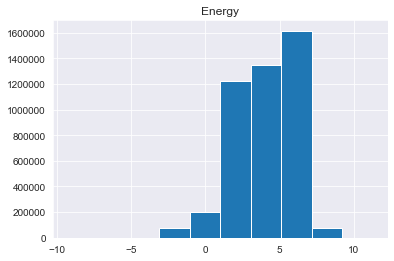

In [235]:
df[["Energy"]].hist()

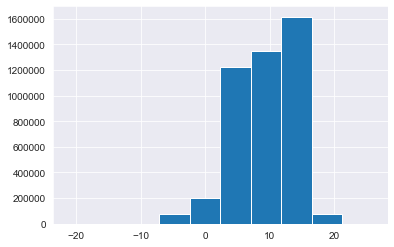

In [17]:
plt.hist(energy_ln)
plt.show()

In [18]:
for col in skewed_cols:
    log_values = np.log10(df[col].values)
    df[col] = log_values

In [23]:
df["Year"] = df["Year"].astype(int)

# Categorical Data

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our data variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

In [14]:
grouped_test = df[['MT', 'Data']].groupby(['MT'])

f_val, p_val = stats.f_oneway(grouped_test.get_group("1")['Data'], grouped_test.get_group('101')['Data'], grouped_test.get_group('102')['Data'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 15917.016298247428 , P = 0.0


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 

In [354]:
def box_plot(x, dataframe=df, figsize=(8,6)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=x, y="Data", data=dataframe)

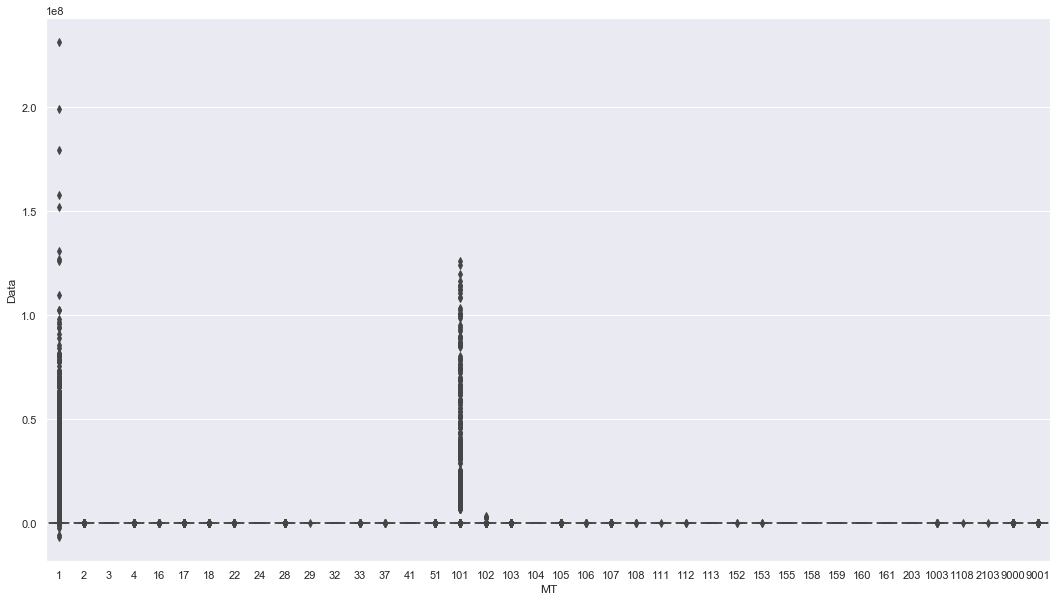

In [355]:
box_plot("MT", figsize=(18,10))

The values for other reaction types get squashed do the large magnitude of fission and total cross section data points (MT1 and MT101). Still it is noticable that these cross sections are magnitudes higher than other types. This feature will be helpful in determining limits to some reaction types (it will learn not to go above certan values.

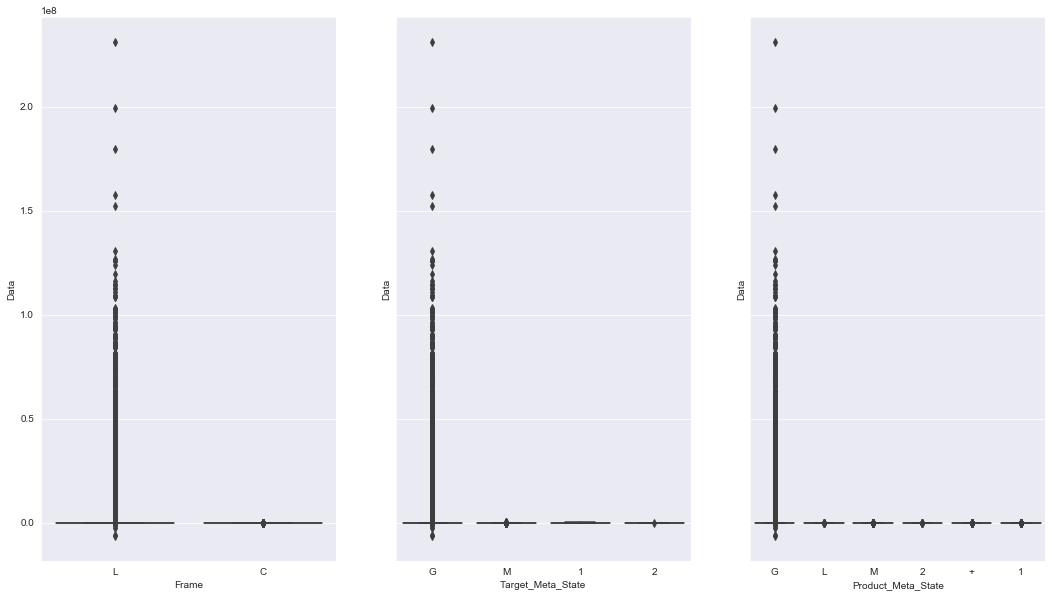

In [18]:
# call regplot on each axes
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(18,10))
sns.boxplot(x="Frame", y="Data", data=df, ax=ax1)
sns.boxplot(x="Target_Meta_State", y="Data", data=df, ax=ax2)
sns.boxplot(x="Product_Meta_State", y="Data", data=df, ax=ax3)

In [65]:
# from sklearn import preprocessing

# sns.set(font_scale = 2)

# power_trans_energy = preprocessing.PowerTransformer().fit_transform(df.Energy.values.reshape(-1, 1))

# plt.figure(figsize=(13,8))
# plt.hist(power_trans_energy)